In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [29]:
k=pd.read_csv('Advertising.csv')
k.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [30]:
k.shape



(200, 5)

In [31]:
k.info

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [32]:
k=k.iloc[:,1:]
k.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [33]:
k.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [34]:
k.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [35]:
k.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


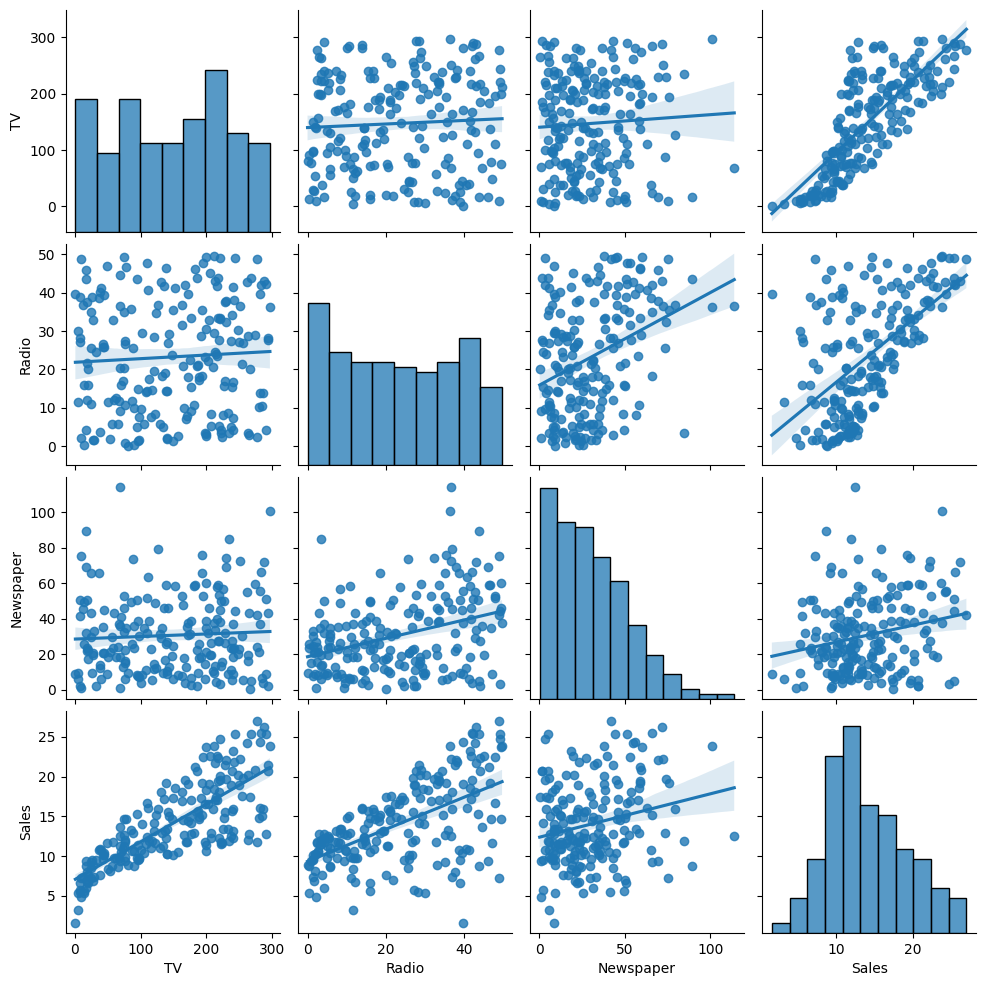

In [36]:
sns.pairplot(k,kind="reg");

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

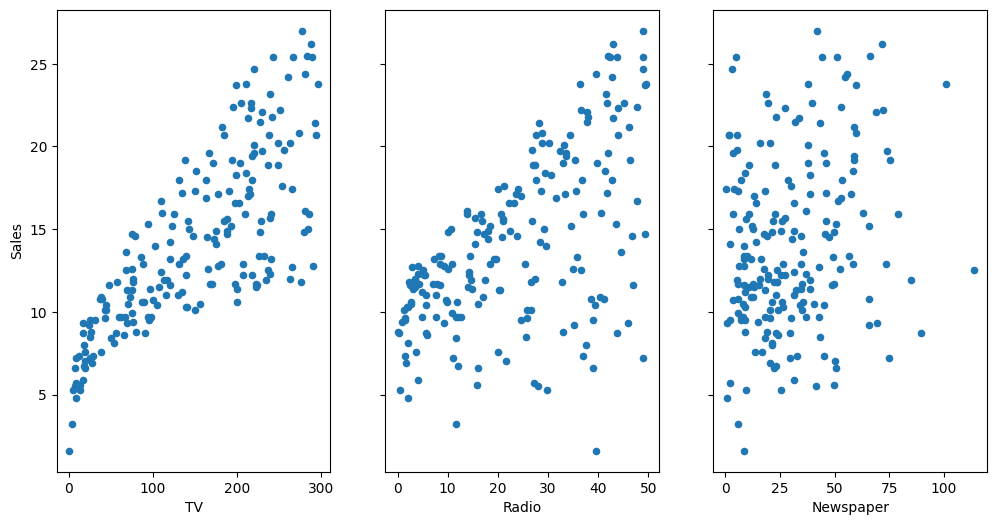

In [37]:
fig,axs= plt.subplots(1,3,sharey=True)
k.plot(kind="scatter",x='TV',y='Sales',ax=axs[0],figsize=(12,6))
k.plot(kind="scatter",x='Radio',y='Sales',ax=axs[1],figsize=(12,6))
k.plot(kind="scatter",x='Newspaper',y='Sales',ax=axs[2],figsize=(12,6))

In [38]:
k=k[k['Newspaper']<=90]
k.shape

(198, 4)

In [39]:
k.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.779121
Radio,0.051978,1.000000,0.346364,0.576748
Newspaper,0.049771,0.346364,1.000000,0.219555
Sales,0.779121,0.576748,0.219555,1.000000


In [40]:

x=k.drop(columns=['Sales'])
y=k['Sales']
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [41]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.tail()

,TV,Radio,Newspaper
191,75.5,10.8,6.0
170,50.0,11.6,18.4
13,97.5,7.6,7.2
104,238.2,34.3,5.3
89,109.8,47.8,51.4


In [43]:
y_test.tail()

106     7.2
4      12.9
154    15.6
84     21.7
130     1.6
Name: Sales, dtype: float64

In [44]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),[]),remainder='passthrough')
scaler=StandardScaler()
o=OrdinalEncoder()

In [47]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor(n_estimators=10,random_state=0)
p=make_pipeline(column_trans,scaler,r)
p.fit(x_train,y_train)
y_pred_r=p.predict(x_test)
r2_score(y_test,y_pred_r)

0.9652972701690237

In [48]:
p.predict([[283.6,42.0,66.2]])

array([25.42])

In [49]:
import pickle
pickle.dump(p,open('sales.pkl','wb'))
p

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=10, random_state=0))])